<a href="https://colab.research.google.com/github/rikdantas/Algoritmos-Estruturas-Dados-II/blob/main/U2T3/source/U2T3_Requisito_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U2T3
### Alunos: Ivamar Dantas Roque e Paulo Ricardo Dantas

## 1.0 Requisito 3
### Objetivo:
**A partir da rede construída gerar uma figura similar considerando o in-Degree dos vértices da rede. A figura deverá ser acompanhada de explicações/descrições.**


In [1]:
# Importando bibliotecas
import networkx as nx
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Baixando o arquivo da rede final para o ambiente

url = 'https://drive.google.com/uc?id=1j00b_-VEnZ2CWxLKNnpU3gDGptuXrr3d'
output = 'fgraph.graphml'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1j00b_-VEnZ2CWxLKNnpU3gDGptuXrr3d
To: /content/fgraph.graphml
100%|██████████| 43.5M/43.5M [00:00<00:00, 46.3MB/s]


'fgraph.graphml'

In [3]:
# Importando o gráfico usando o networkx
fgraph = nx.read_graphml('/content/fgraph.graphml')

# Printando a quantidade de nós e arestas da rede
print("fgraph  ->  {} nodes, {} edges".format(len(fgraph), nx.number_of_edges(fgraph)))

fgraph  ->  5997 nodes, 415322 edges


### 1.1 Probability Density Function

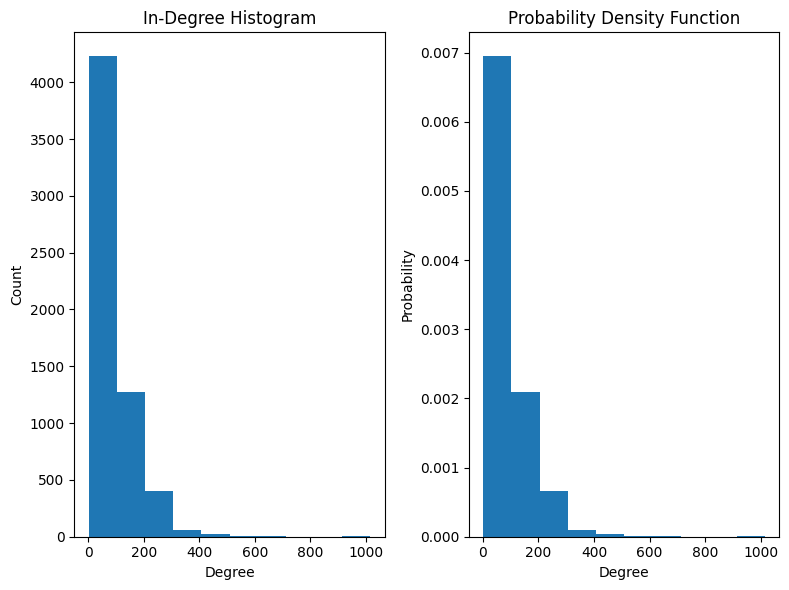

In [4]:
# Plotando o Histograma

plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in fgraph.in_degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=10)
ax[1].hist(degree_sequence,bins=10,density=True)

ax[0].set_title("In-Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [5]:
# calc the width of each bin using numpy
# diff calc the difference between two positions in the array
bin_width = np.diff(all_data[1])

# total number of elements in array
all_data[0].sum()

# probability density function for each bin
# please check the right figure above and compare the results
all_data[0]/(all_data[0].sum() * bin_width)

array([6.94600174e-03, 2.08971481e-03, 6.65357309e-04, 9.03571654e-05,
       3.77857237e-05, 4.92857266e-06, 9.85714532e-06, 1.64285755e-06,
       0.00000000e+00, 6.57143021e-06])

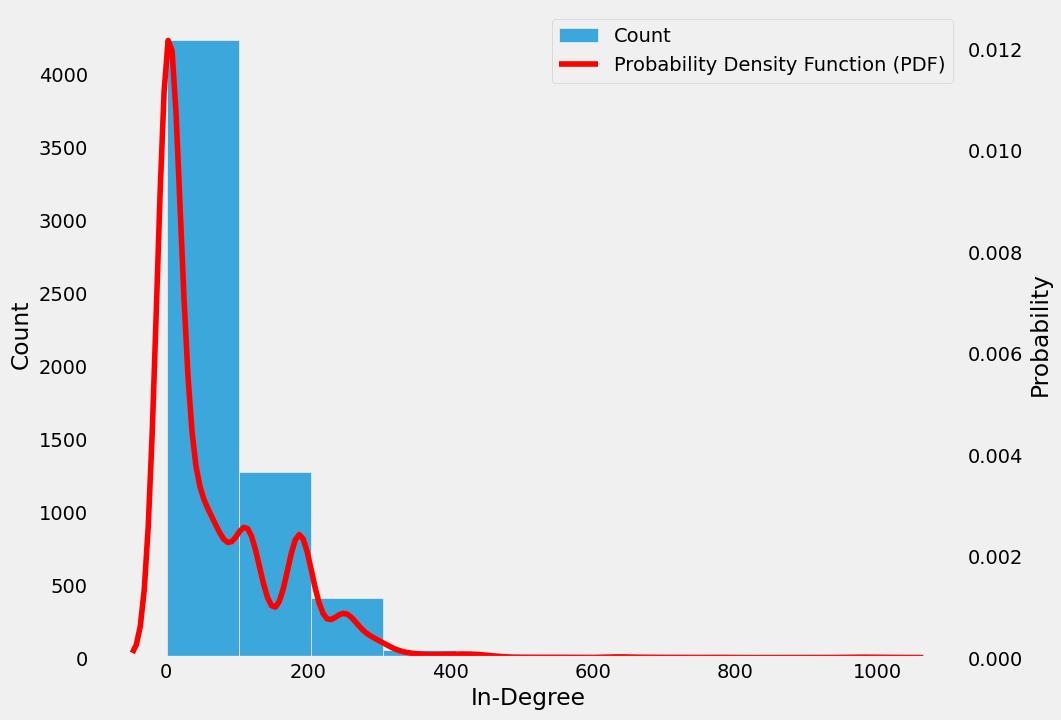

In [6]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=10,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In-Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

### 1.2 Cumulative Density Function

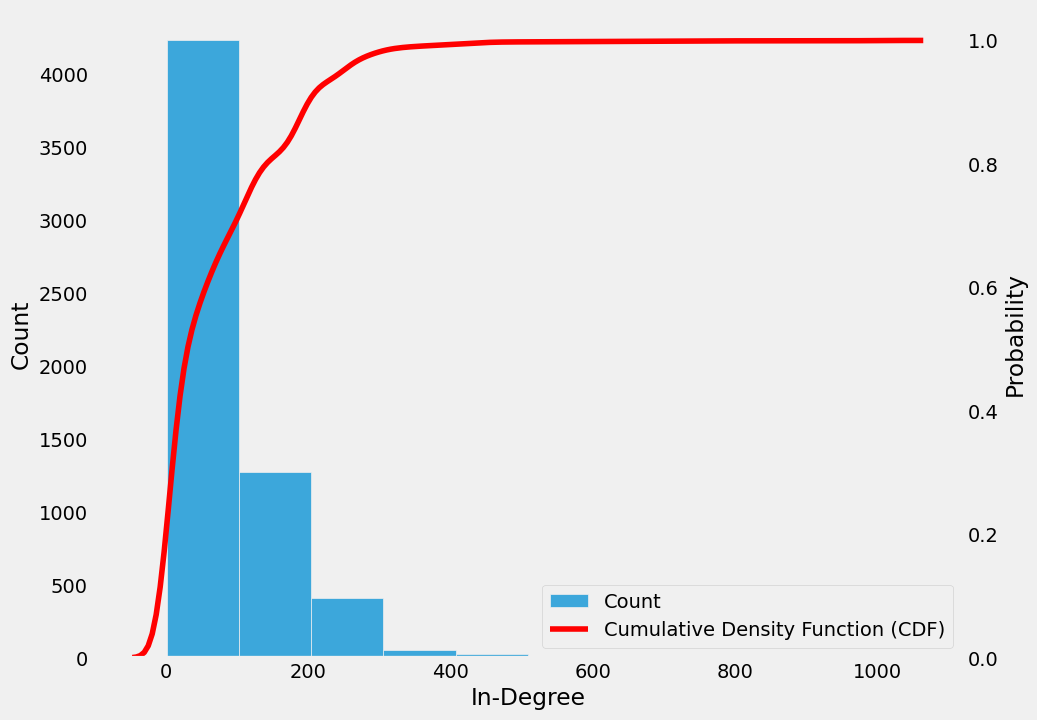

In [7]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=10,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In-Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()